In [79]:
# %config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令

### 下面这个是phiTrans的similarity embedding的可视化，包括heatmap图

In [100]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_query_uniformx4"
# exp_name = "new_PhiTrans_align_sim_tile5k_1abmil0sel"
exp_name = "new_PhiTrans_align_sim_tile5ktwice500"
# exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,0,70,0.384893,0.615107,1,1,0.026785,0.004730,0.029232,0.031903,...,0.007101,0.010095,0.005920,0.030423,0.019750,0.022828,0.046522,0.007050,0.028370,0.033942
1,1,71,0.677291,0.322709,0,1,-0.066908,-0.012266,-0.073360,-0.080154,...,-0.018323,-0.025657,-0.015206,-0.076427,-0.049782,-0.057221,-0.116418,-0.018282,-0.071315,-0.085581
2,2,72,0.133482,0.866518,1,1,0.150918,0.027384,0.165243,0.180509,...,0.040968,0.057601,0.034041,0.172122,0.112011,0.128945,0.262462,0.040822,0.160547,0.192498
3,3,73,0.826358,0.173642,0,1,-0.176832,-0.032181,-0.193685,-0.211605,...,-0.048127,-0.067587,-0.039977,-0.201770,-0.131341,-0.151123,-0.307574,-0.047978,-0.188199,-0.225707
4,4,74,0.505539,0.494461,0,1,-0.008362,-0.001673,-0.009275,-0.010163,...,-0.002472,-0.003344,-0.002030,-0.009688,-0.006362,-0.007214,-0.014616,-0.002495,-0.009052,-0.010943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.761403,0.238597,0,1,-0.116561,-0.021265,-0.127703,-0.139531,...,-0.031793,-0.044601,-0.026401,-0.133047,-0.086624,-0.099634,-0.202762,-0.031703,-0.124099,-0.148862
146,146,348,0.212880,0.787120,1,1,0.093119,0.016921,0.101986,0.111400,...,0.025307,0.035561,0.021023,0.106223,0.069135,0.079581,0.161955,0.025220,0.099106,0.118847
147,147,349,0.493007,0.506993,1,1,-0.004723,-0.000895,-0.005189,-0.005690,...,-0.001335,-0.001843,-0.001105,-0.005425,-0.003545,-0.004043,-0.008230,-0.001340,-0.005040,-0.006062
148,148,350,0.130271,0.869729,1,1,0.153955,0.028005,0.168626,0.184212,...,0.041881,0.058826,0.034789,0.175651,0.114333,0.131577,0.267776,0.041746,0.163858,0.196510


/tmp/ipykernel_2167138/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

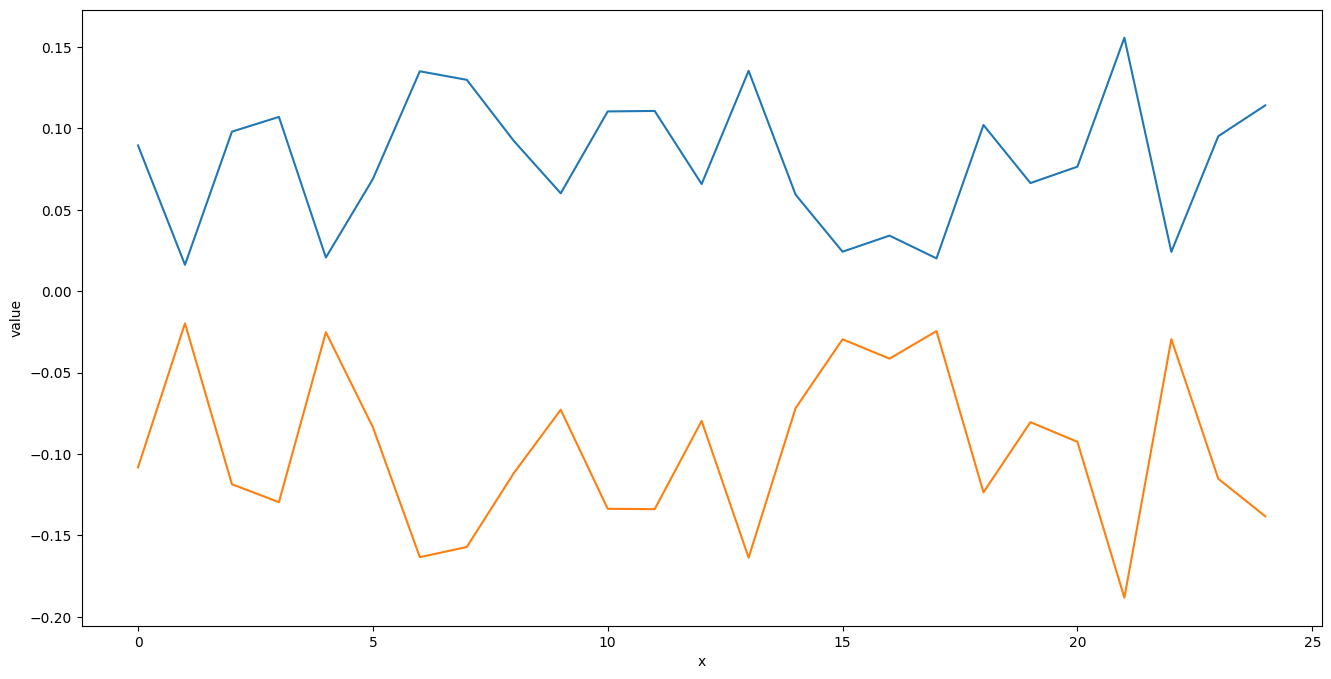

In [101]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

min value: -0.33667827
max value: -0.0014476869


<Axes: >

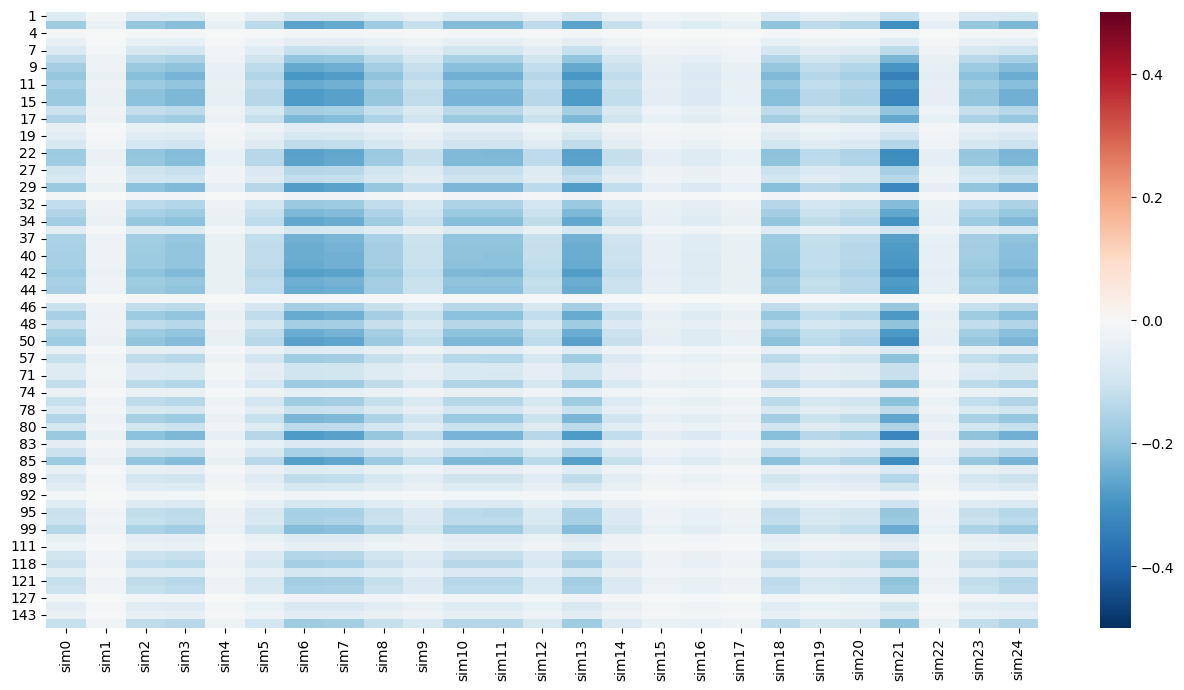

In [102]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

min value: -0.009492612
max value: 0.33875167


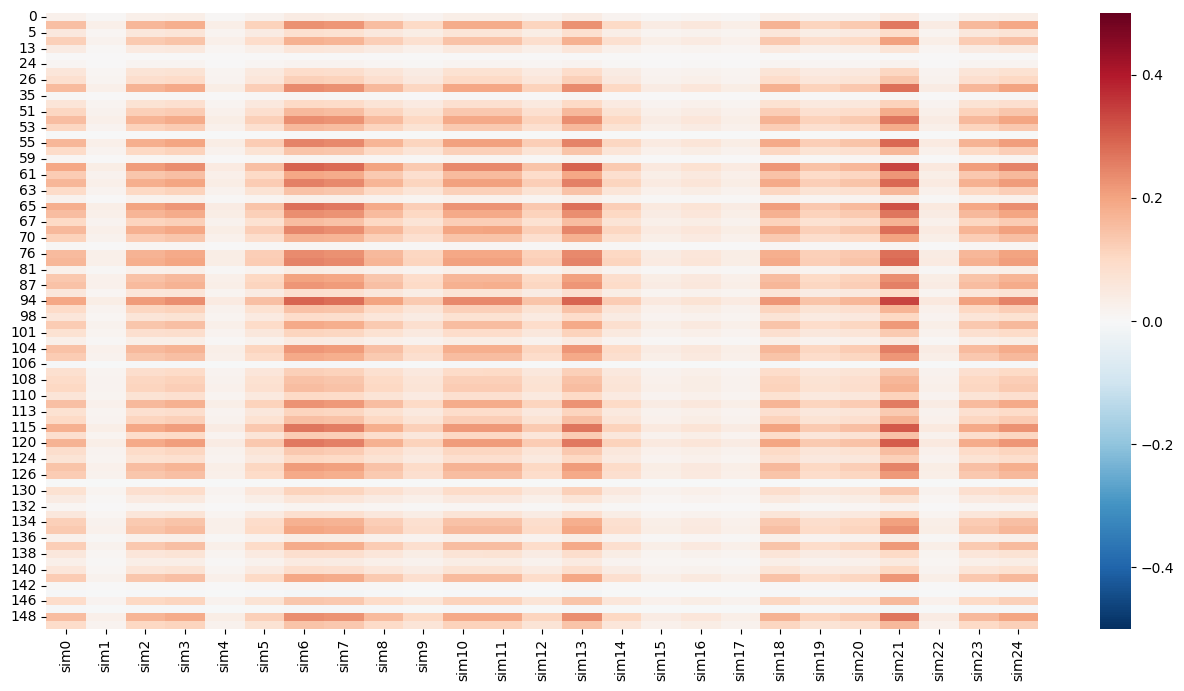

In [103]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:]
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

plt.show()

### 下面这个实验结果是随机初始化prototype作为query，在测试集上预测similarity可视化

In [104]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform"
exp_name = "new_PhiTrans_sim_tile5ktwice500_query_uniformx4"
# exp_name = "new_PhiTrans_align_sim_tile5k_1abmil0sel"
# exp_name = "new_PhiTrans_align_sim_tile5ktwice500"
# exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim90,sim91,sim92,sim93,sim94,sim95,sim96,sim97,sim98,sim99
0,0,70,0.679014,0.320986,0,1,-0.049829,-0.000456,0.000026,0.001340,...,-0.053286,0.000793,0.000987,0.001038,-0.001082,0.000909,0.001864,0.049083,0.000775,0.001912
1,1,71,0.104642,0.895358,1,1,0.160468,-0.001611,0.002730,-0.006722,...,0.170002,-0.004366,-0.006019,-0.005334,0.006782,0.001774,-0.004720,-0.157753,-0.001772,-0.003129
2,2,72,0.075222,0.924778,1,1,0.197574,-0.001946,0.003367,-0.008254,...,0.209282,-0.005377,-0.007400,-0.006544,0.008321,0.002201,-0.005838,-0.194215,-0.002211,-0.003834
3,3,73,0.858397,0.141603,0,1,-0.172132,0.000754,-0.002032,0.006449,...,-0.182870,0.004106,0.005554,0.005092,-0.006230,-0.000406,0.005464,0.169319,0.002129,0.004322
4,4,74,0.498268,0.501732,1,1,-0.004053,-0.000687,0.000605,-0.000400,...,-0.004681,-0.000323,-0.000525,-0.000335,0.000611,0.001082,0.000418,0.004061,0.000213,0.000806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.742283,0.257717,0,1,-0.075041,-0.000201,-0.000267,0.002377,...,-0.080158,0.001397,0.001851,0.001876,-0.002110,0.000877,0.002558,0.073928,0.000992,0.002589
146,146,348,0.117328,0.882672,1,1,0.147334,-0.001720,0.002728,-0.006361,...,0.155957,-0.004151,-0.005749,-0.005053,0.006485,0.002001,-0.004232,-0.144813,-0.001574,-0.002633
147,147,349,0.396606,0.603394,1,1,0.020236,-0.001038,0.001105,-0.001499,...,0.021006,-0.001041,-0.001527,-0.001212,0.001748,0.001495,-0.000246,-0.019808,-0.000028,0.000424
148,148,350,0.127157,0.872843,1,1,0.137993,-0.001609,0.002543,-0.005955,...,0.146084,-0.003881,-0.005377,-0.004732,0.006069,0.001852,-0.003961,-0.135637,-0.001469,-0.002482


/tmp/ipykernel_2167138/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

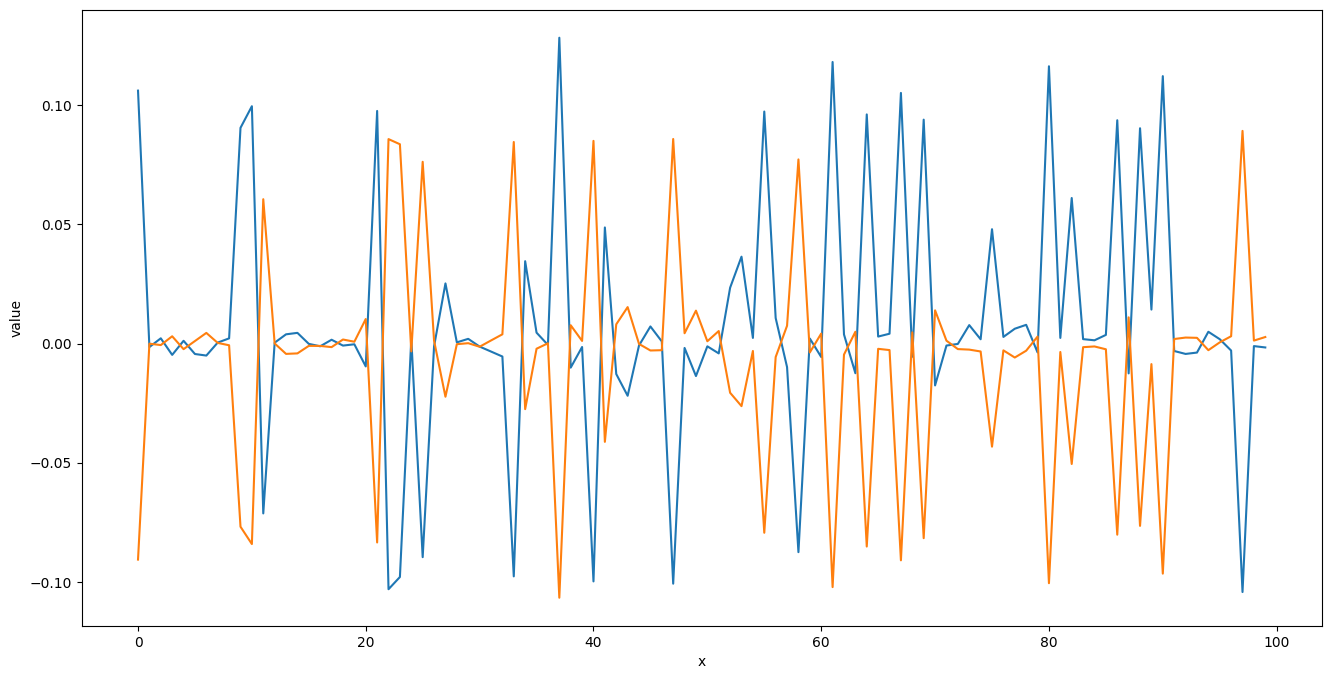

In [105]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))

sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

min value: -0.21542563
max value: 0.17848761


<Axes: >

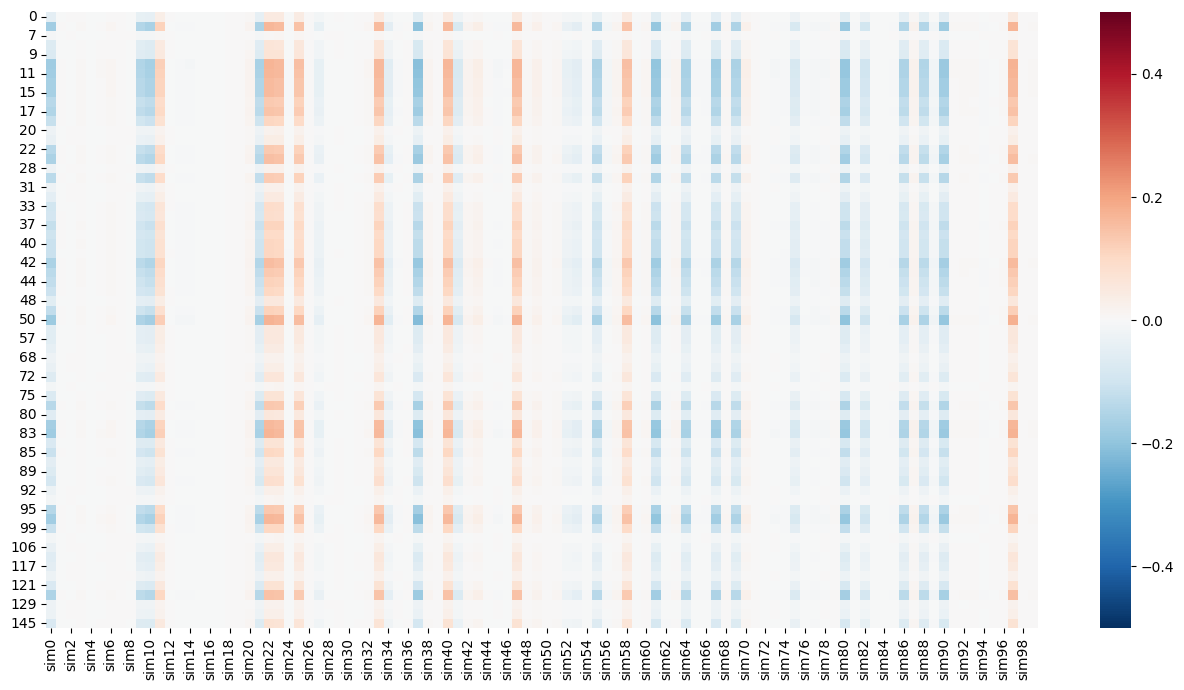

In [106]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

min value: -0.19421478
max value: 0.23713546


<Axes: >

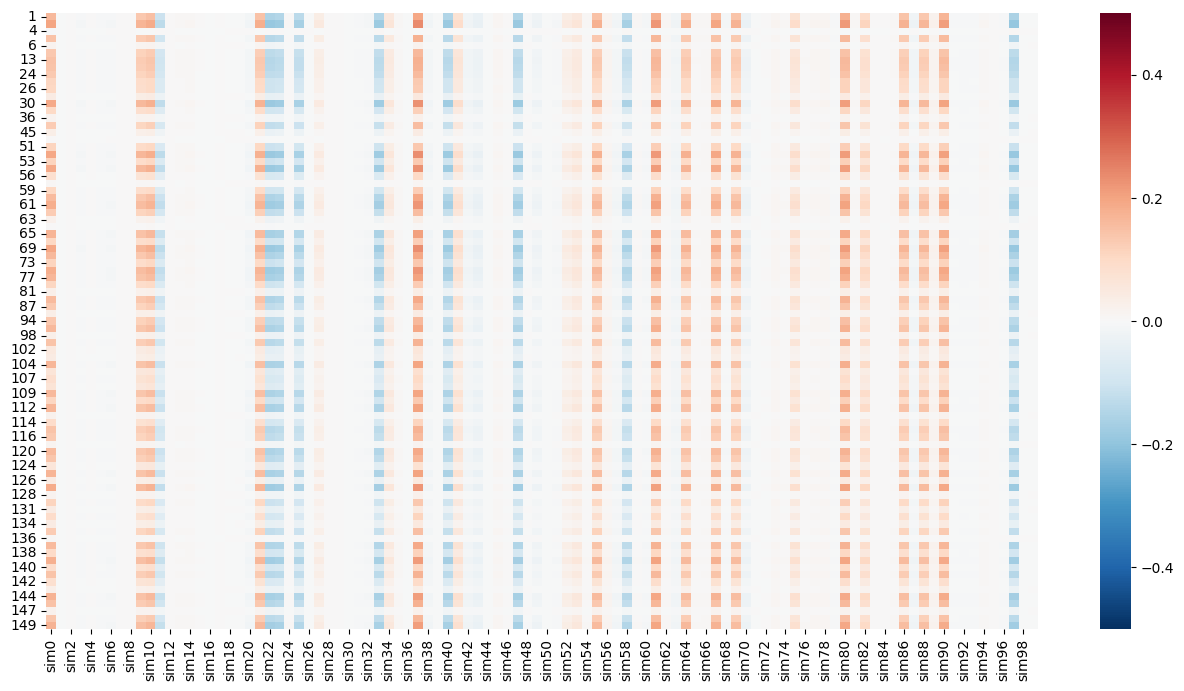

In [108]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:]
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

### 下面这个是new_ABMIL的最后cls_token特征拿出来，进行分析

In [109]:
exp_name = "new_ABMIL"

tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim246,sim247,sim248,sim249,sim250,sim251,sim252,sim253,sim254,sim255
0,0,70,0.374486,0.625514,1,1,0.001768,0.040778,0.115696,0.000000,...,0.009356,0.011516,0.030217,0.000000,0.0,0.0,0.139480,0.014454,0.014922,0.005699
1,1,71,0.527084,0.472916,0,1,0.003165,0.024093,0.070802,0.000000,...,0.012658,0.019230,0.017445,0.000000,0.0,0.0,0.087064,0.022021,0.021604,0.009195
2,2,72,0.171038,0.828962,1,1,0.000000,0.066767,0.190329,0.000567,...,0.004238,0.000000,0.049746,0.000839,0.0,0.0,0.235630,0.000000,0.000000,0.000000
3,3,73,0.716128,0.283872,0,1,0.007405,0.007558,0.023787,0.000000,...,0.018474,0.030086,0.004160,0.000000,0.0,0.0,0.029435,0.034648,0.032629,0.016747
4,4,74,0.686922,0.313078,0,1,0.007166,0.010195,0.032600,0.000000,...,0.017985,0.028030,0.005173,0.000000,0.0,0.0,0.041999,0.032176,0.031277,0.016351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.387824,0.612176,1,1,0.000452,0.038400,0.108527,0.000159,...,0.007668,0.012255,0.028459,0.000000,0.0,0.0,0.132262,0.017133,0.015325,0.005009
146,146,348,0.339088,0.660912,1,1,0.000418,0.040999,0.112243,0.000000,...,0.006066,0.008633,0.029624,0.000000,0.0,0.0,0.139369,0.008969,0.010585,0.003547
147,147,349,0.556978,0.443022,0,1,0.003927,0.023017,0.063707,0.000000,...,0.012536,0.020594,0.015569,0.000000,0.0,0.0,0.081088,0.025145,0.023882,0.010893
148,148,350,0.317367,0.682633,1,1,0.000266,0.044789,0.120707,0.000000,...,0.005682,0.007274,0.031947,0.000000,0.0,0.0,0.150618,0.008718,0.010021,0.003366


/tmp/ipykernel_2167138/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

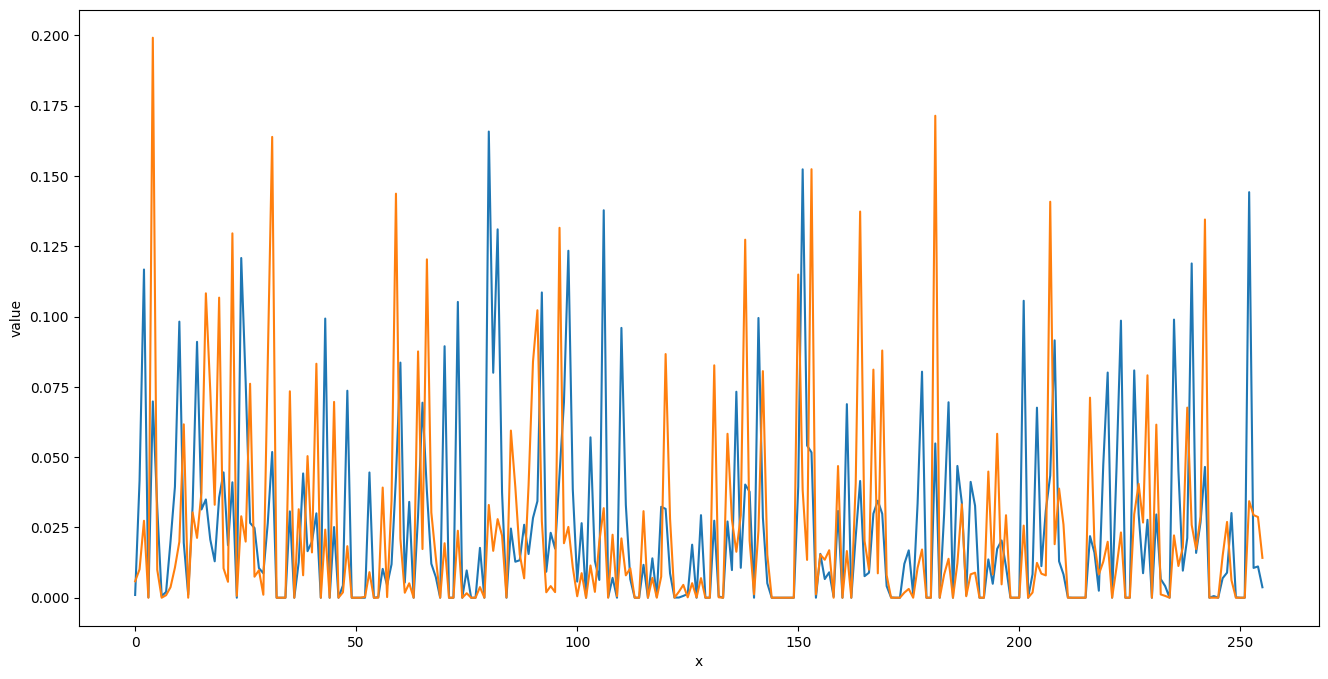

In [110]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

min value: 0.0
max value: 0.3138802


<Axes: >

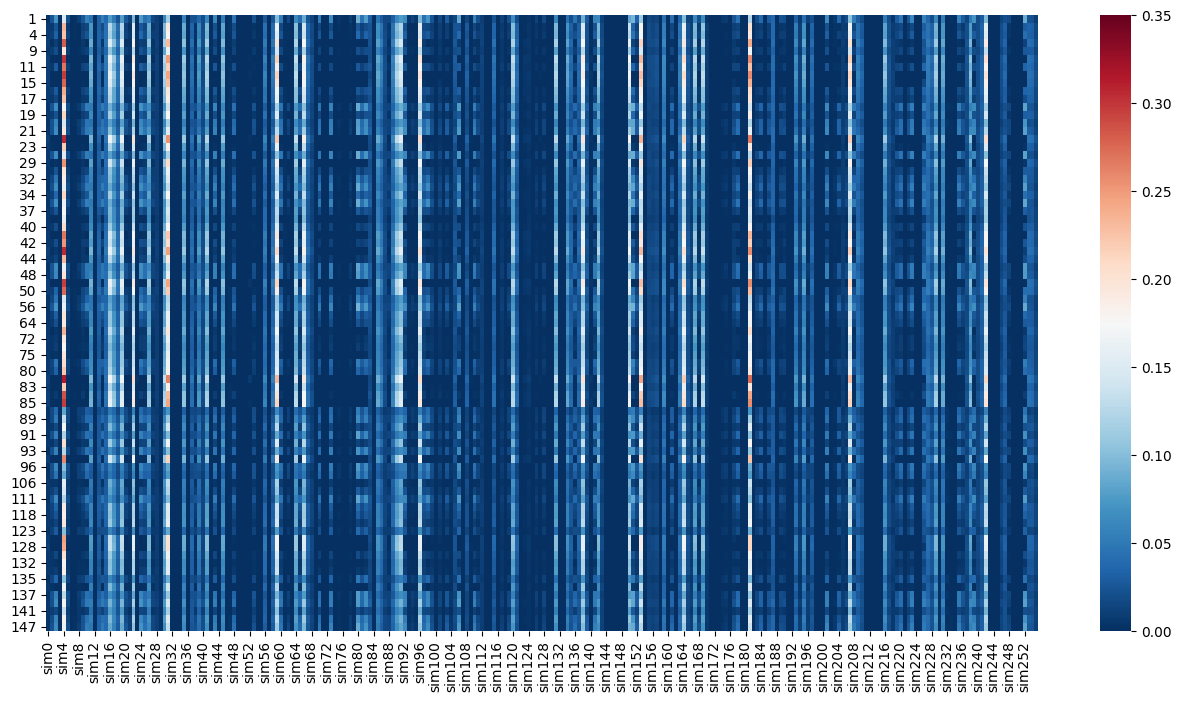

In [111]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=0.35, vmin=0.0) 


min value: 0.0
max value: 0.31484503


<Axes: >

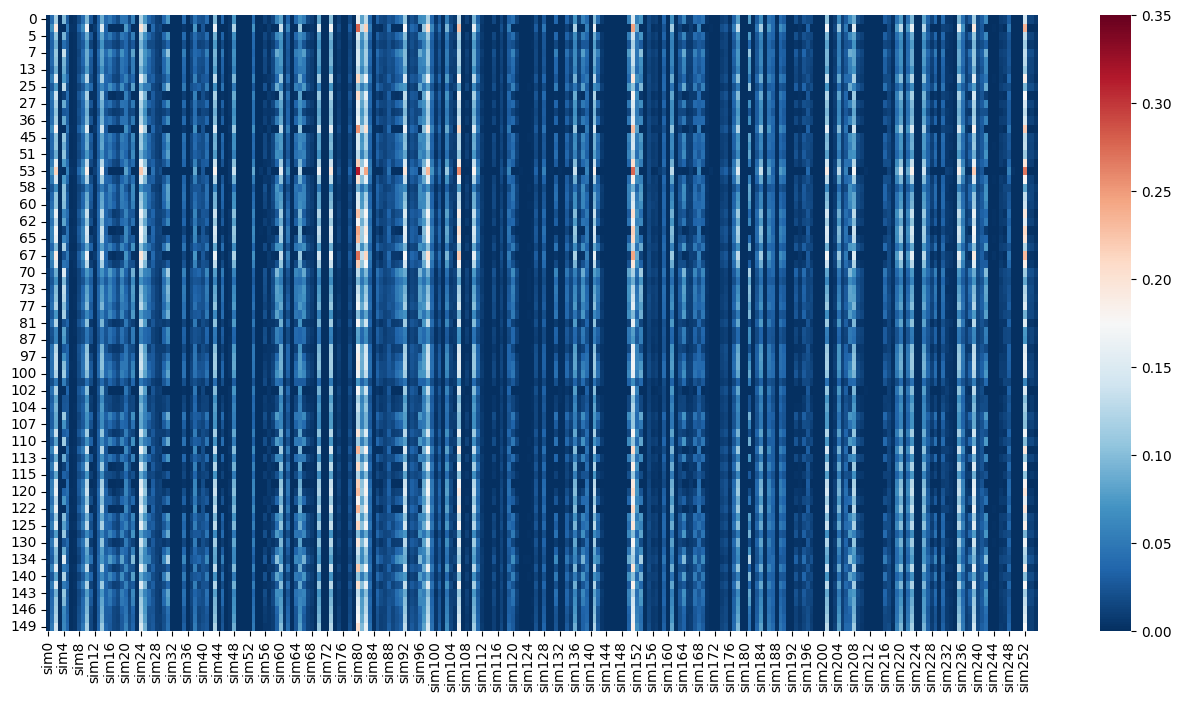

In [112]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:]
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=0.35, vmin=0.0) 


### 下面这个是transformer的最后cls_token特征拿出来，进行分析

In [113]:
exp_name = "new_Transformer"

tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim246,sim247,sim248,sim249,sim250,sim251,sim252,sim253,sim254,sim255
0,0,70,0.408169,0.591831,1,1,-0.229523,-1.202269,0.828614,-0.514677,...,-0.228668,0.018743,-0.243132,1.535339,0.194021,-0.186607,-0.437070,-0.988665,-0.013807,2.619522
1,1,71,0.645698,0.354302,0,1,-0.232722,-1.092153,0.880333,-0.358606,...,-0.162304,-0.077875,-0.471322,1.653136,0.436947,0.189108,-0.217081,-1.053709,-0.211904,2.438331
2,2,72,0.096587,0.903413,1,1,-0.115803,-1.273553,0.712421,-0.644300,...,-0.176167,-0.089065,-0.308481,1.558179,0.153735,-0.360706,-0.575530,-1.173538,0.296690,2.738534
3,3,73,0.838773,0.161227,0,1,-0.464178,-1.293738,0.905926,-0.462411,...,0.088837,0.112244,-0.297958,1.525980,0.331423,0.051165,-0.346304,-0.559580,-0.228970,2.646797
4,4,74,0.683378,0.316622,0,1,-0.465862,-1.091042,0.748457,-0.482751,...,-0.065938,-0.000365,-0.363608,1.731794,0.425092,0.252657,-0.355278,-0.902403,-0.175397,2.541858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.838161,0.161839,0,1,-0.230113,-1.142777,0.880855,-0.671702,...,0.125820,0.115624,-0.400134,1.411322,0.637181,-0.455584,-0.174600,-0.853487,-0.203223,2.393653
146,146,348,0.322004,0.677996,1,1,-0.216897,-1.109098,0.864275,-0.625833,...,-0.041298,-0.047701,-0.261581,1.546842,0.313236,-0.198228,-0.482387,-0.837512,0.158357,2.526124
147,147,349,0.813872,0.186128,0,1,-0.295913,-1.098058,0.962431,-0.540541,...,0.016719,0.063255,-0.308248,1.543372,0.453772,-0.117043,-0.289618,-0.671512,-0.186872,2.289966
148,148,350,0.252083,0.747917,1,1,-0.095960,-1.151268,0.966086,-0.601636,...,-0.079965,-0.020978,-0.349545,1.617766,0.381521,-0.256326,-0.346214,-0.856617,0.013420,2.460125


/tmp/ipykernel_2167138/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

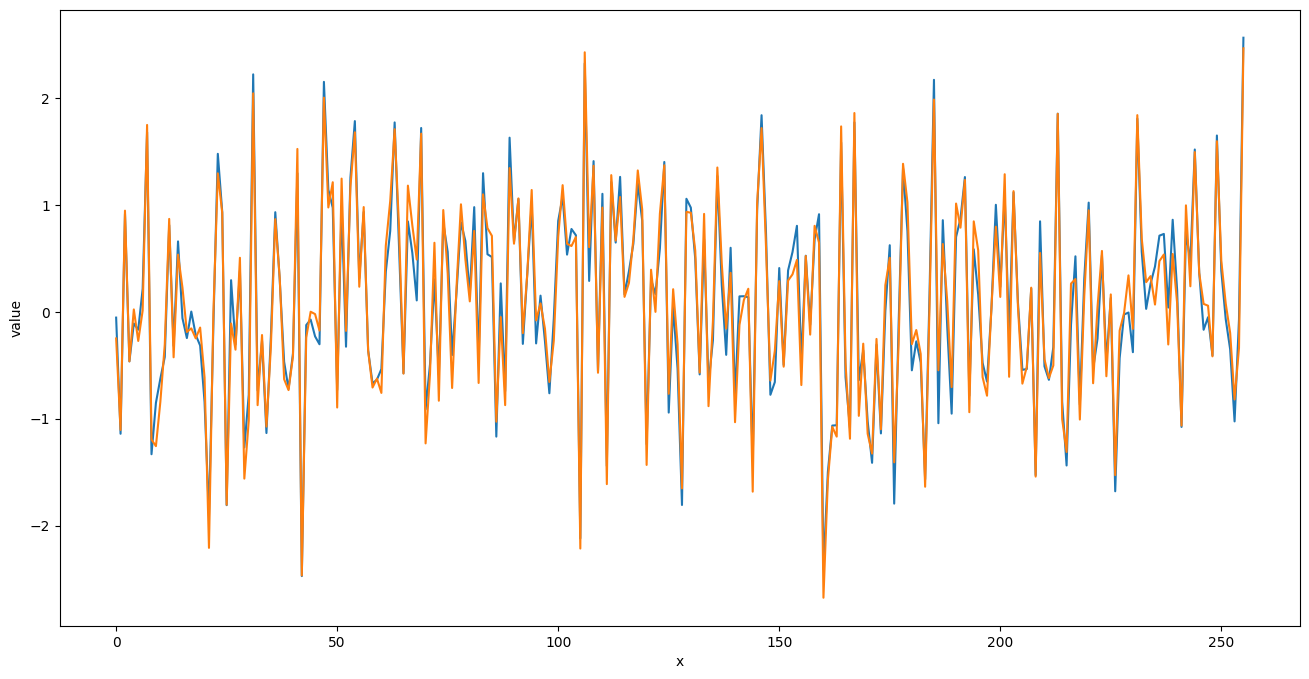

In [114]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

min value: -3.053052
max value: 2.7581036


<Axes: >

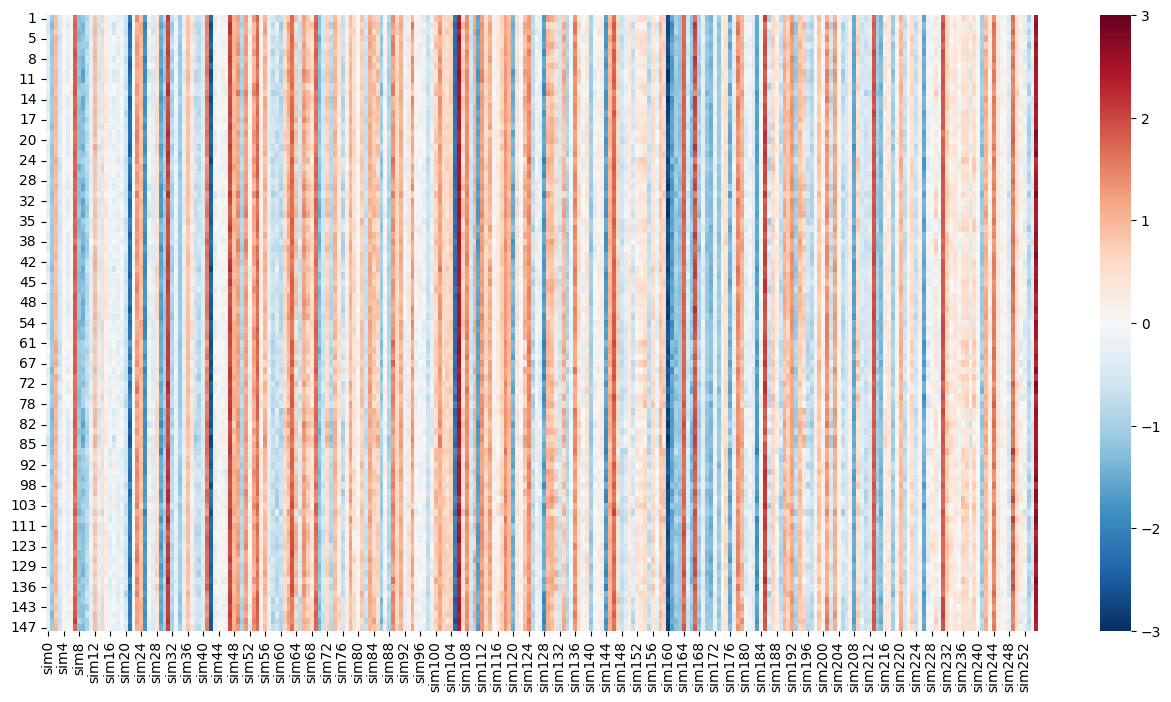

In [115]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=3, vmin=-3) 


min value: -2.8067045
max value: 2.9812984


<Axes: >

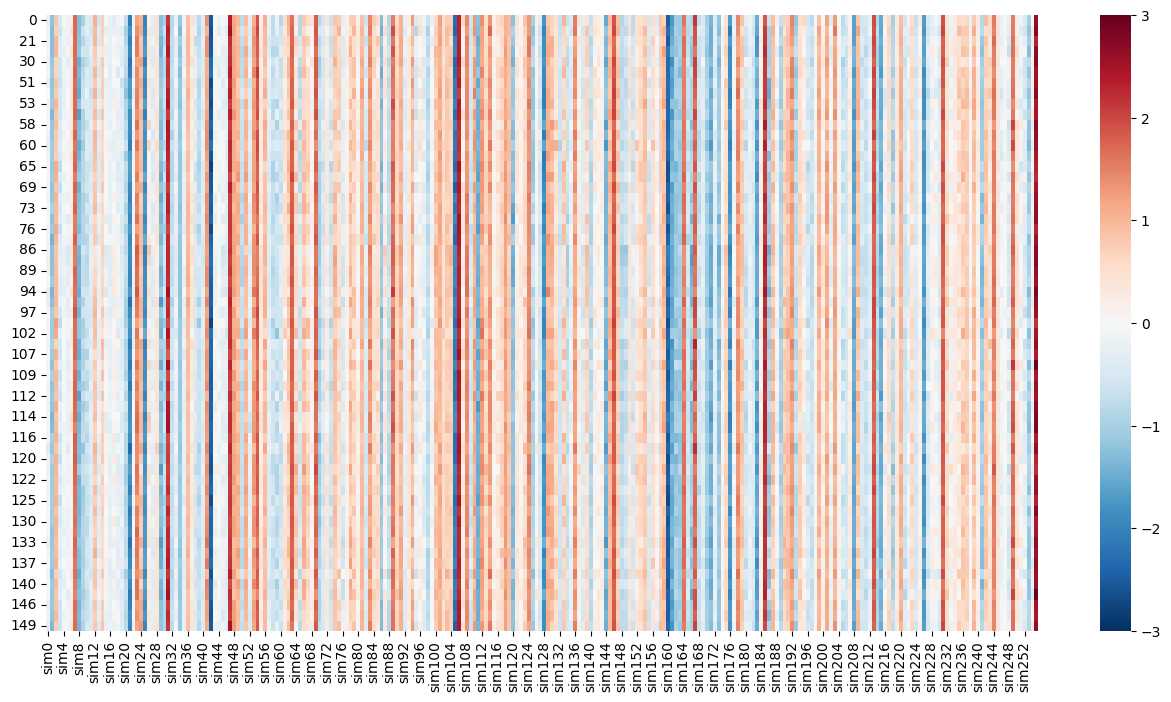

In [116]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:]
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=3, vmin=-3) 


#### 下面是画2d的KDE图，对于每个similarity

/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


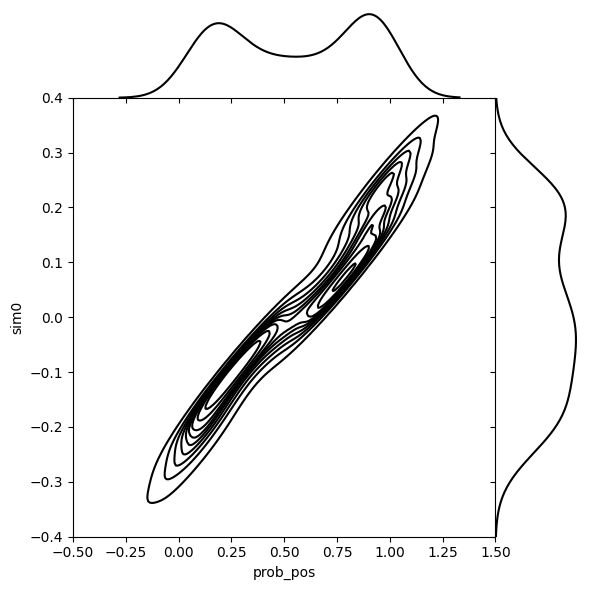

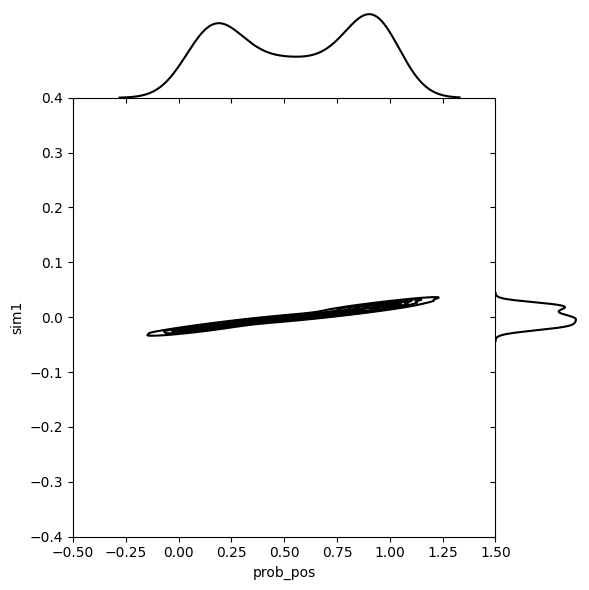

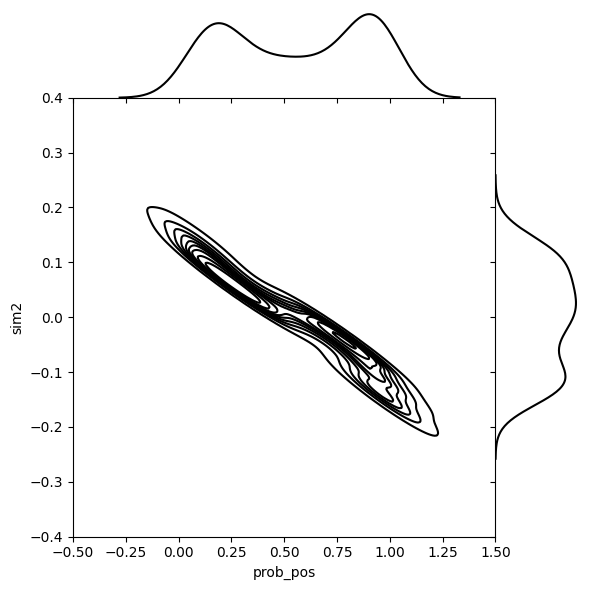

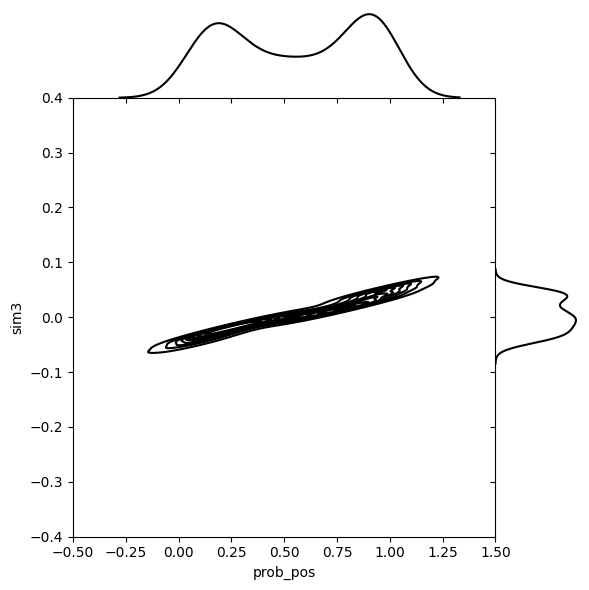

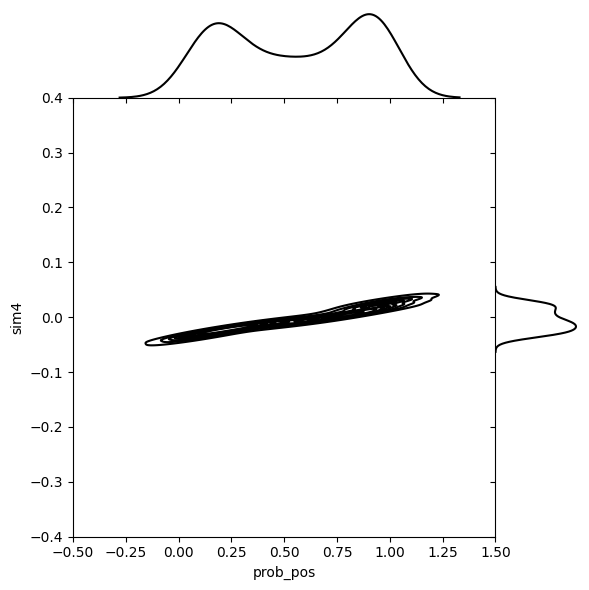

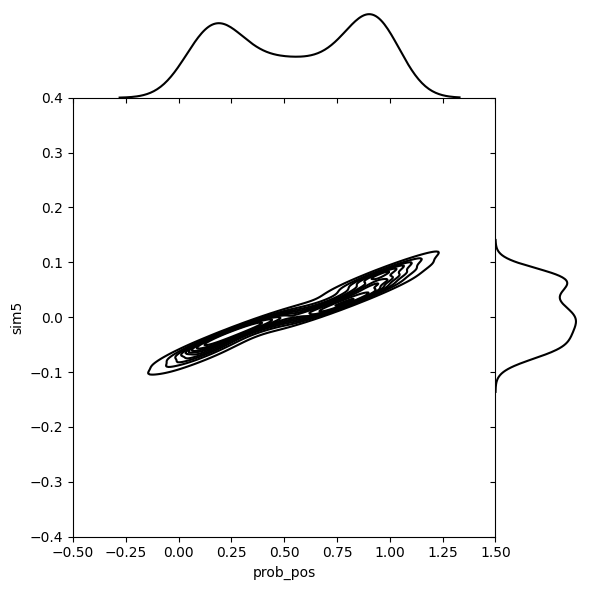

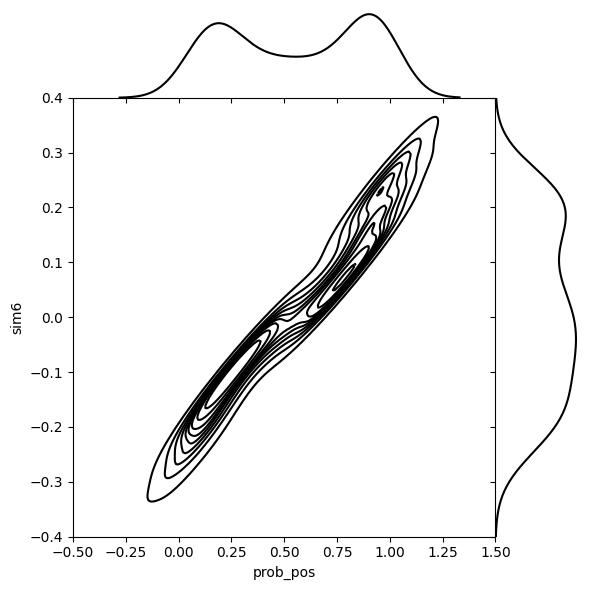

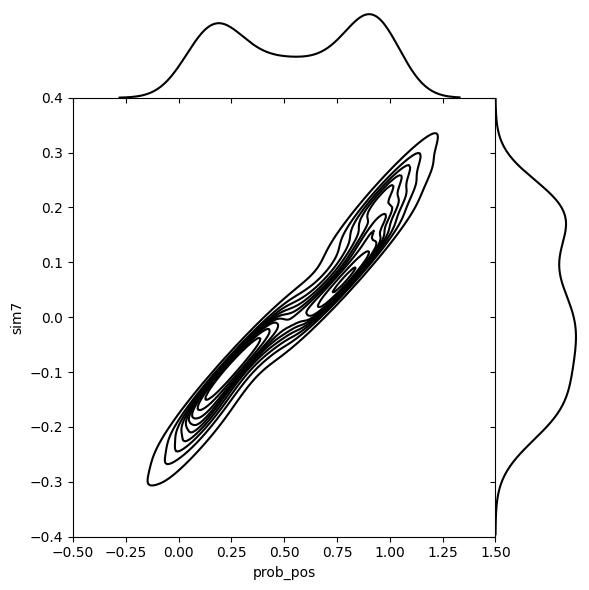

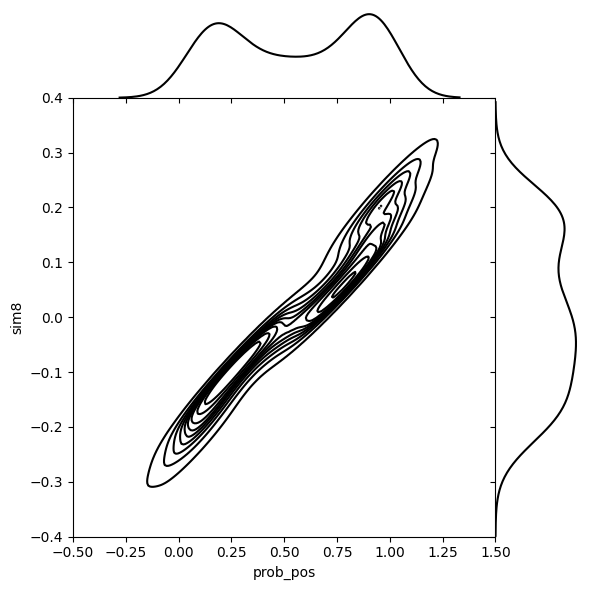

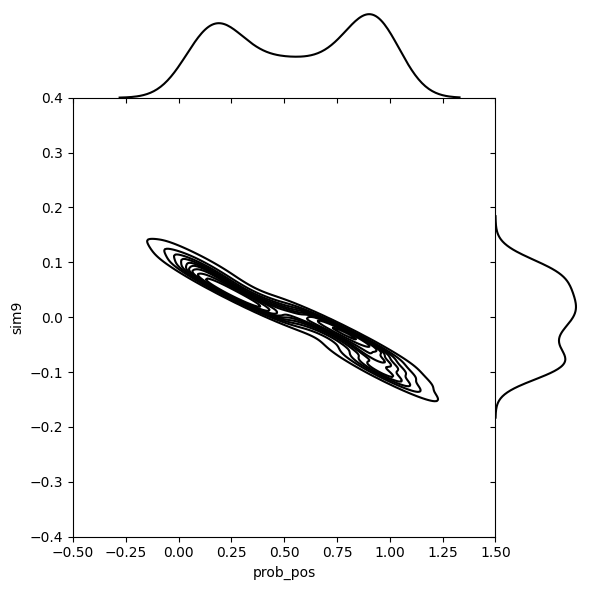

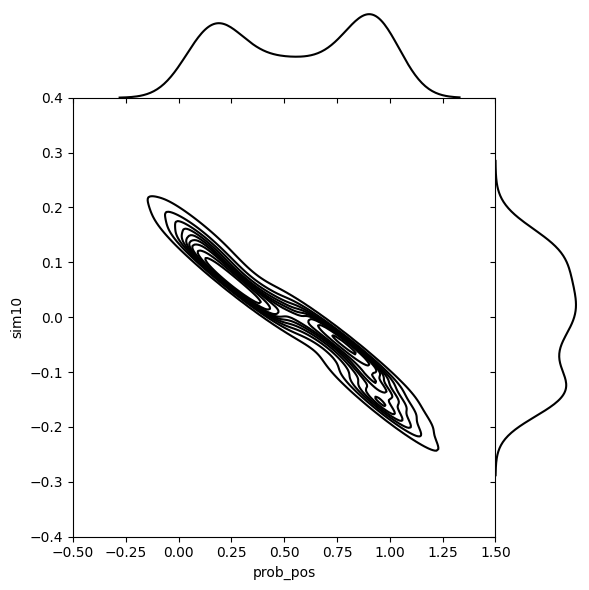

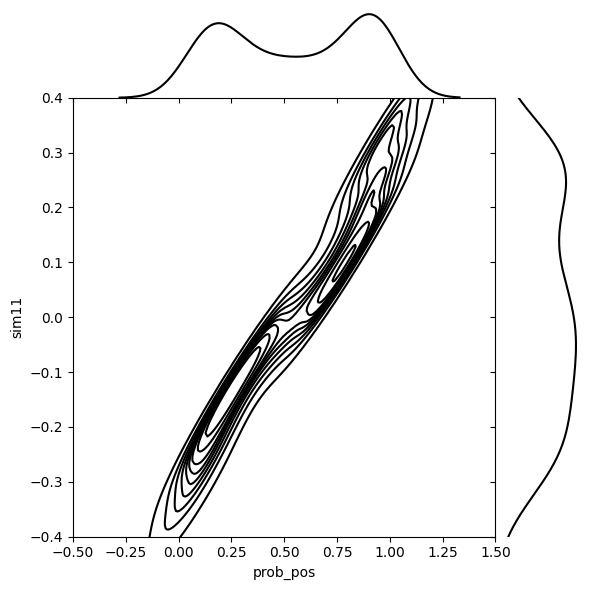

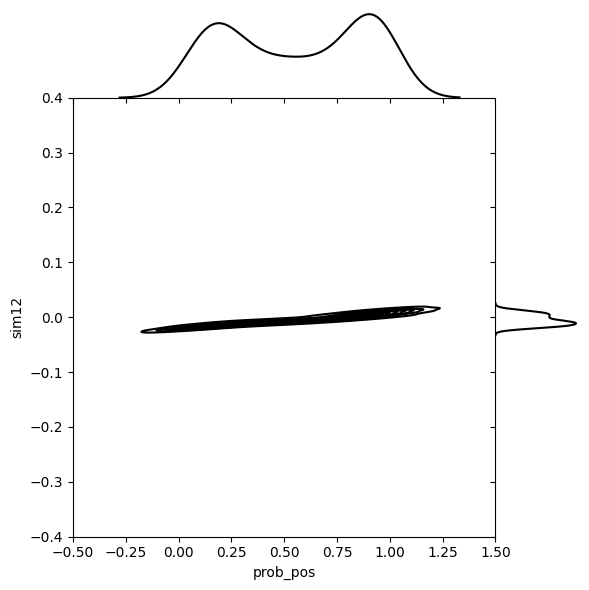

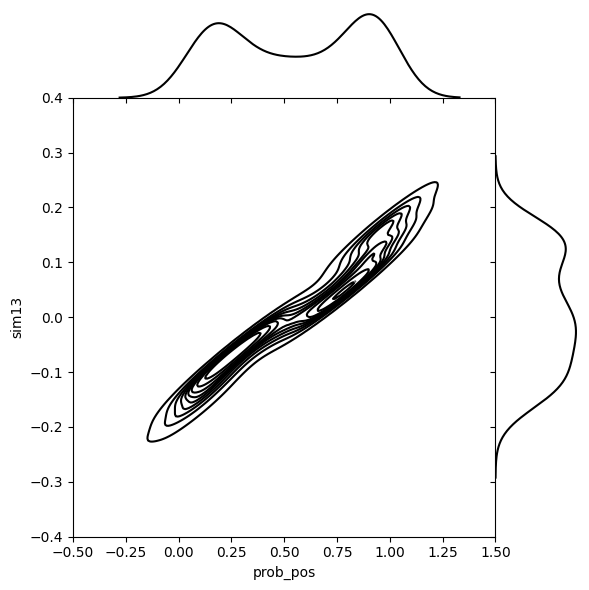

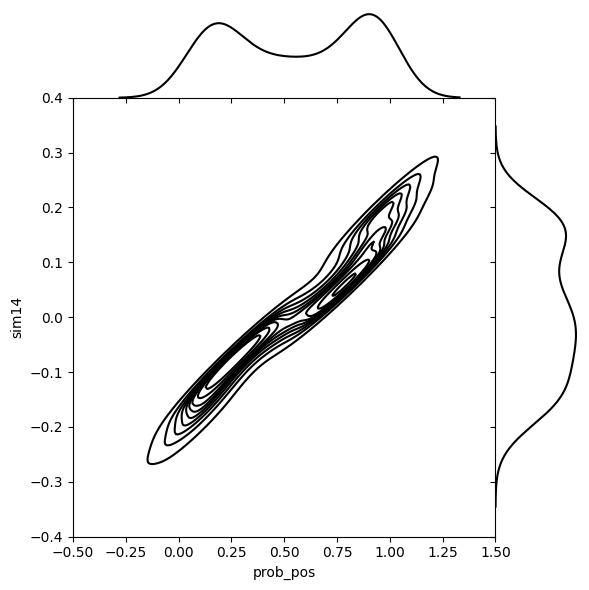

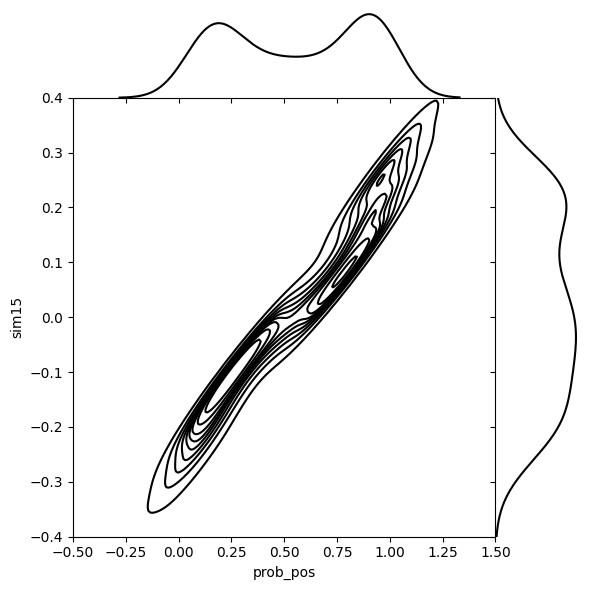

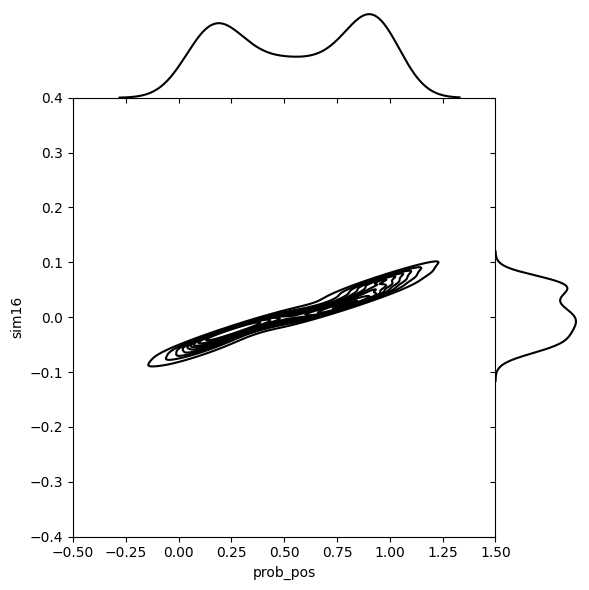

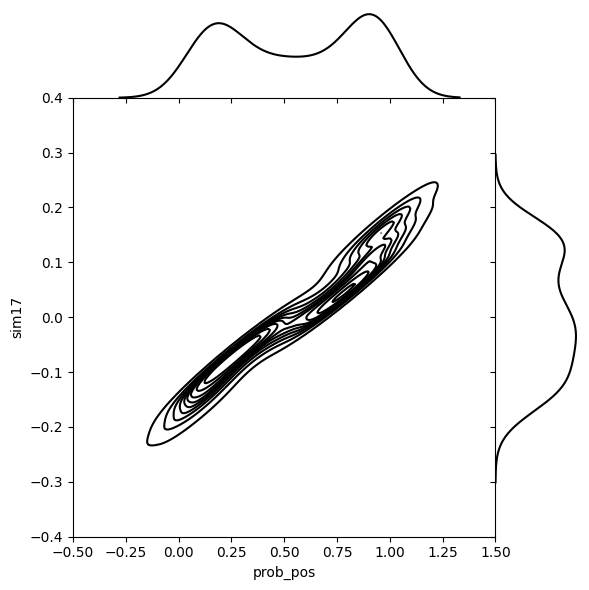

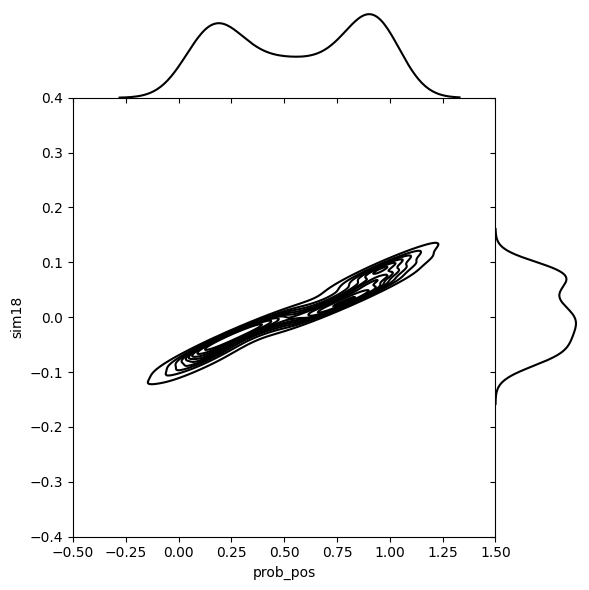

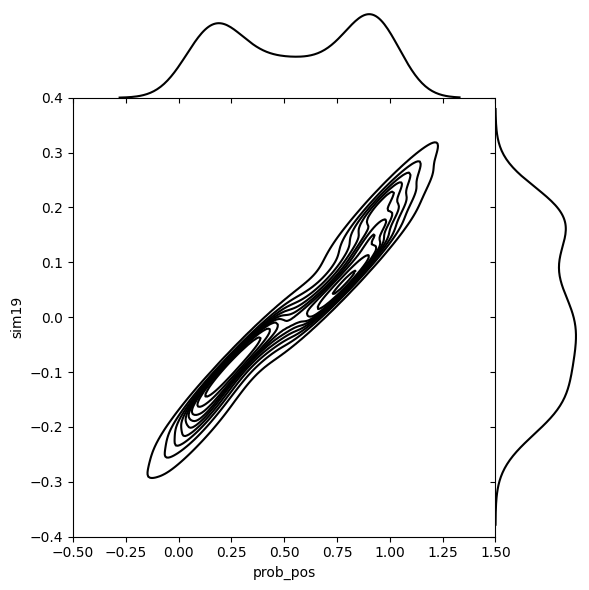

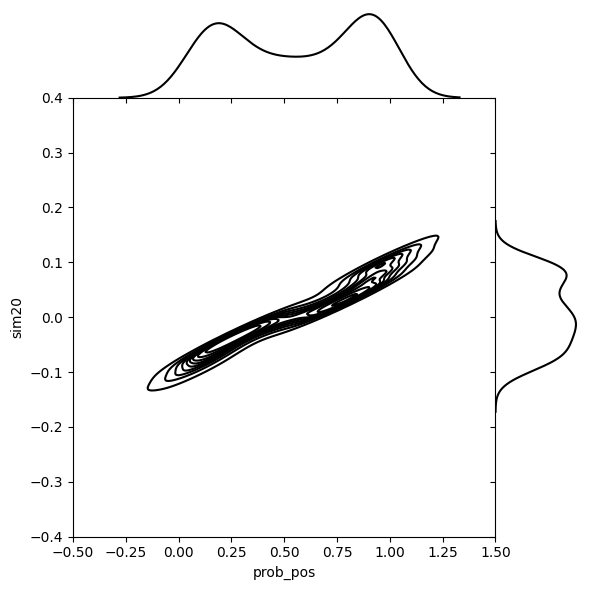

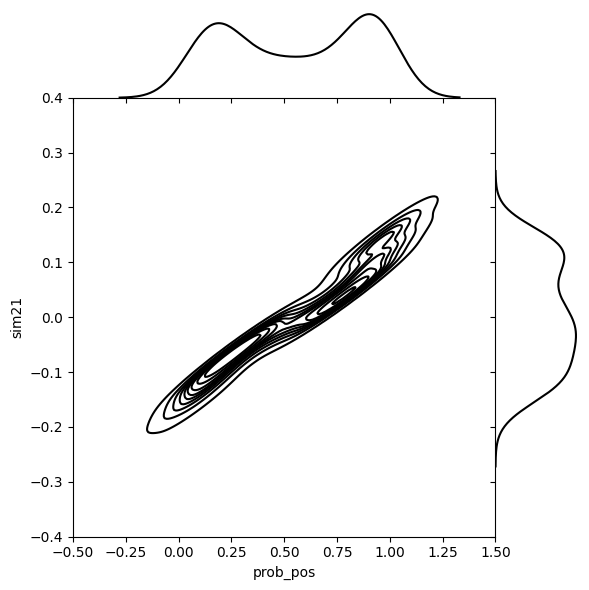

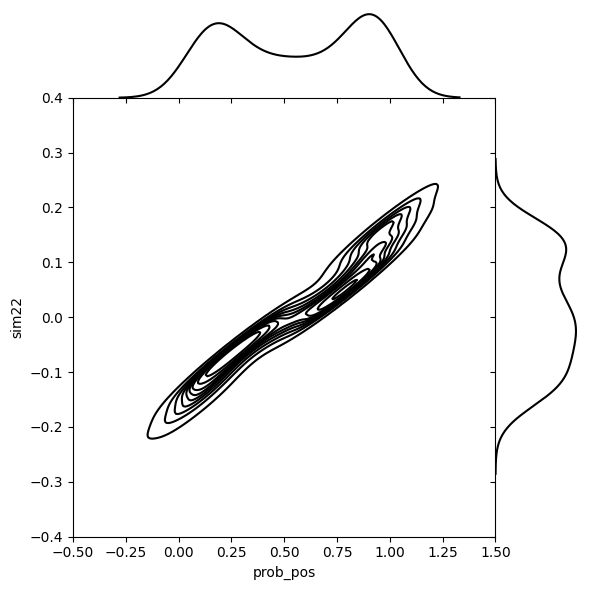

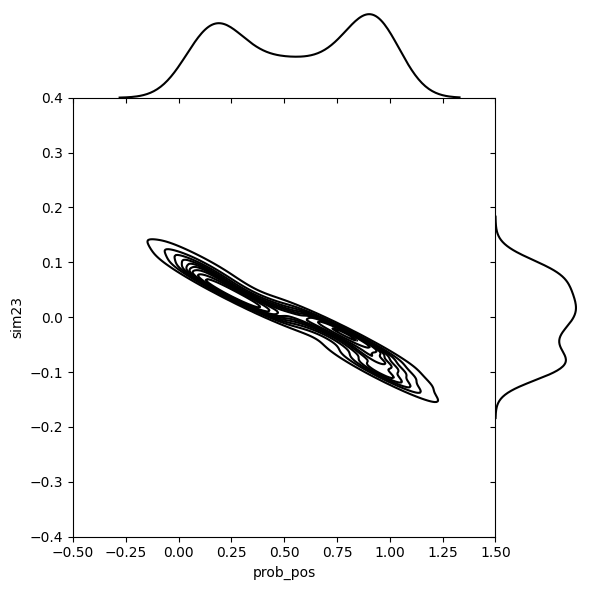

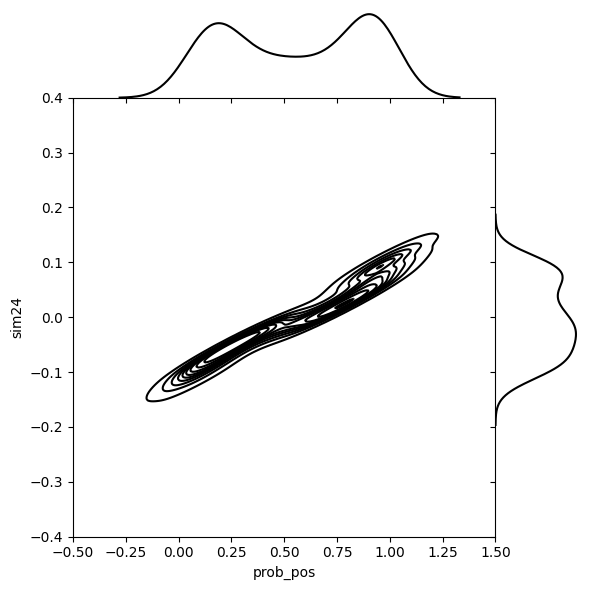

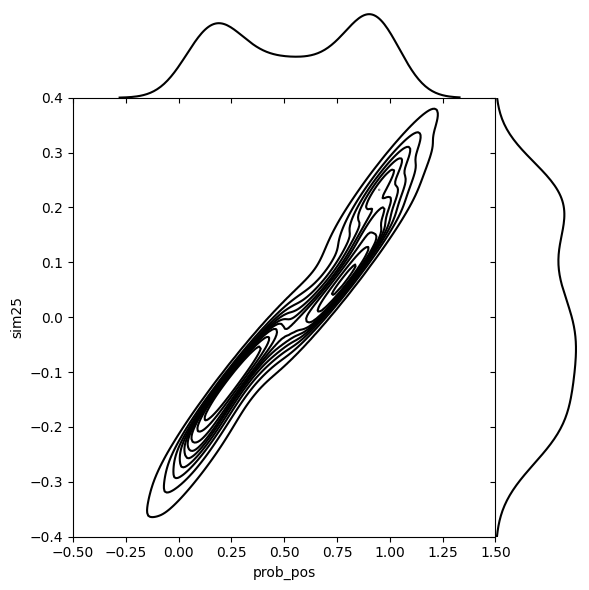

In [79]:
for idx in range(26):
    # eval_res[f"sim{idx}"] = (eval_res[f"sim{idx}"] - eval_res[f"sim{idx}"].min()) / (eval_res[f"sim{idx}"].max() - eval_res[f"sim{idx}"].min())
    fig = sns.jointplot(x=eval_res["prob_pos"], y=eval_res[f"sim{idx}"], kind="kde", 
                color="#000000", space=0,
                xlim=[-0.5,1.5], ylim=[-0.4, 0.4])
    # plot = fig.get_figure()
    # plt.show()
    fig.savefig(f"/home/cyyan/Projects/HER2proj/post_results/kde_sim{idx}.svg", dpi=400)
